# Clustering Yelp Restaurants

**Part 2: To be completed INDIVIDUALLY and due on March 3 at 7pm.**

In this assignment, we will continue to work with the [Yelp dataset](https://www.yelp.com/dataset/challenge) that we used in Homework 2-1.

We will continue to try to find culinary **districts** in Las Vegas. As a reminder from last time, these are characterized by **closeness** and **similarity** of restaurants. Use the "longitude" and "latitude" to cluster closeness.

However, in this analysis we will not use the Yelp-supplied "categories" to cluster for similarity as we did in Part 1. Instead, we will cluster the reviews themselves, extracting categories in an unsupervised fashion.  

Specifically, you are to use Latent Semantic Analysis (LSA) on the Yelp reviews to cluster restaurants based off on their reviews. As a reminder, LSA consists of using PCA applied to the document-term matrix.

Now, your feature vectors will contain latitude, longitude and the most relatively important review terms. 

You will apply PCA 3 times. Each time, you will take into account the first $k$ reviews per business, where $k = \{10,100,1000\}$. Many businesses will have less than $k$, or even no reviews. In this case, simply assign to the business the maximum number of reviews it has.
**(4 pts)**

In [2]:
import json

In [3]:
'''Extract latitude and longtitude by business id'''
business = []
with open('business.json') as f:
    for i in f:
        data=json.loads(i)
        if data['city']=='Las Vegas':
            if 'Restaurants' in data['categories']:
                business.append({'business_id':data['business_id'], 'latitude':data['latitude'], 'longitude':data['longitude'],'review_count':data['review_count']})
print(business[0])

{'business_id': 'Pd52CjgyEU3Rb8co6QfTPw', 'latitude': 36.0669136, 'longitude': -115.1708484, 'review_count': 13}


In [4]:
latitude = [i['latitude'] for i in business]
longitude = [i['longitude'] for i in business]

In [ ]:
ID = [i['business_id'] for i in business]
ID

In [6]:
len(ID)

5899

In [7]:
review = {}
with open('review.json') as f:
    for i in f:
        data = json.loads(i)
        if data['business_id'] in ID:
            if data['business_id'] not in review:
                review[data['business_id']] = [data['text']]
            else:
                review[data['business_id']].append(data['text'])
print(review['Pd52CjgyEU3Rb8co6QfTPw'])

['Nice, open bar with great views of the strip and golf course.  Patio seating also.  Nice happy hour prices.  Had the carnitas nachos...very good.  And they serve breakfast all day.  Not noisy or smoky', "We usually stop here after using the driving range. The place is very clean,including the restrooms. The food is good and the employees are friendly. The atmosphere is casual and relaxing. The view of the Strip is a plus.There are numerous TV's to watch sports.\nThis would be a great place to watch the football games after hitting a bucket of balls.", 'The first time we ate here everything was good.  Since that first we have tried it four more times.  The service and the food have been a big disappointment.  On the last visit I had to return my burger because it was not cooked.  When they brought it back it had an unusual odor but I ate it anyway.  Sick for three days.  Great location but we wont eat here again.', "So I took my daughter there for breakfast and some practice. Eaten at

In [8]:
data10 = []
data100 = []
data1000 = []
for i in ID:
    a = ''.join(review[i][:10])
    data10.append(a)
    
for i in ID:
    b = ''.join(review[i][:100])
    data100.append(b)
    
for i in ID:
    c = ''.join(review[i][:1000])
    data1000.append(c)

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', min_df=0.2,max_df=0.7)
dtm10 = vectorizer.fit_transform(data10)  # return term-document matrix
print(type(dtm10),dtm10.shape)
terms10 = vectorizer.get_feature_names()
print(terms10)

<class 'scipy.sparse.csr.csr_matrix'> (5899, 270)
['10', '15', '20', '30', 'absolutely', 'actually', 'amazing', 'area', 'ask', 'asked', 'ate', 'atmosphere', 'attentive', 'away', 'awesome', 'bad', 'bar', 'beef', 'better', 'big', 'bit', 'bite', 'bread', 'breakfast', 'bring', 'brought', 'business', 'busy', 'called', 'came', 'care', 'cheap', 'check', 'cheese', 'chicken', 'clean', 'close', 'cold', 'come', 'comes', 'coming', 'cooked', 'cool', 'couldn', 'counter', 'couple', 'cream', 'customer', 'customers', 'day', 'deal', 'decent', 'decided', 'definitely', 'delicious', 'did', 'didn', 'different', 'dining', 'dinner', 'disappointed', 'dish', 'dishes', 'does', 'doesn', 'drink', 'drinks', 'drive', 'dry', 'eat', 'eating', 'end', 'enjoy', 'enjoyed', 'especially', 'excellent', 'expect', 'experience', 'extra', 'extremely', 'family', 'fan', 'far', 'fast', 'favorite', 'feel', 'felt', 'finally', 'flavor', 'free', 'fresh', 'fried', 'friend', 'friendly', 'friends', 'fries', 'gave', 'getting', 'going', 'gu

In [10]:
import numpy as np
dtm10_dense = dtm10.todense()
centered_dtm10 = dtm10_dense - np.mean(dtm10_dense, axis=0)
np.sum(centered_dtm10,axis=0)[:,:10]

matrix([[  4.18845514e-13,  -6.87783164e-14,   1.33885958e-13,
           5.80889503e-14,   1.55458979e-13,   1.55139790e-13,
           1.01987863e-13,  -9.96008831e-14,  -2.96113828e-13,
           4.09006162e-13]])

In [11]:
u10, s10, vt10 = np.linalg.svd(centered_dtm10)

In [12]:
import pandas as pd
pd.DataFrame(vt10,columns=vectorizer.get_feature_names())

,10,15,20,30,absolutely,actually,amazing,area,ask,asked,...,work,working,worst,worth,wouldn,wrong,years,yelp,yes,yummy
0,0.022784,0.034034,0.032854,0.024940,-0.019919,0.002907,-0.078770,0.002903,0.027573,0.079017,...,0.062607,0.071997,0.063813,-0.037068,0.004798,0.053017,-0.001309,-0.026331,0.006329,-0.031200
1,-0.006964,-0.005331,-0.018308,-0.018094,-0.003987,-0.008712,-0.049996,-0.038577,-0.010933,-0.004864,...,0.024919,0.020522,0.016603,-0.017589,-0.012237,0.019616,-0.015069,-0.000829,-0.007125,0.013220
2,0.042551,0.055091,0.056065,0.047363,-0.010903,0.013494,-0.088377,-0.002231,0.040944,0.098020,...,0.024291,0.014757,0.075470,-0.022796,0.018181,0.064795,0.010504,-0.010519,0.005322,-0.038995
3,-0.026732,-0.037899,-0.028116,-0.035968,-0.002402,-0.010787,0.041868,0.006867,-0.041654,-0.105071,...,-0.017121,-0.018696,-0.051479,0.015551,-0.009924,-0.016594,-0.007655,0.004700,-0.005435,0.021470
4,-0.035851,-0.053181,-0.042429,-0.035854,0.000100,-0.031577,0.056310,0.041713,-0.030935,-0.078965,...,0.068715,0.044594,-0.027209,-0.024401,-0.031403,-0.016364,0.001440,0.000184,-0.014121,0.016549
5,0.019866,0.012237,0.020359,0.006033,-0.027506,0.002961,-0.092783,0.014452,0.017995,0.035012,...,-0.012342,0.003754,0.014477,-0.037723,0.000043,-0.008064,-0.003099,-0.041861,-0.002722,-0.024472
6,-0.000341,0.007683,0.008660,0.012225,0.023873,0.000693,0.071671,-0.012282,0.023442,0.046117,...,0.011742,0.012313,-0.001415,0.011944,0.014065,0.009605,0.005056,0.011384,0.001976,0.014677
7,0.020025,0.009350,0.009935,0.007101,-0.051759,0.027688,-0.160377,0.004421,-0.003325,0.003416,...,-0.035002,0.000472,0.012339,0.005399,0.011796,0.005844,-0.010584,0.002230,0.012981,-0.023099
8,-0.013208,-0.027899,-0.018324,-0.013729,-0.043872,0.024698,-0.138569,0.005785,-0.027053,-0.062480,...,-0.036824,-0.011389,0.037529,0.016963,0.014981,-0.002693,0.030842,-0.026847,0.020571,-0.036406
9,0.023685,0.030833,0.035379,0.038209,0.003810,0.035486,-0.024482,0.001829,-0.013750,0.048429,...,-0.027932,0.003611,0.004670,0.015775,0.023118,-0.023485,0.001003,0.054371,0.026368,0.007678


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', min_df=0.2,max_df=0.7)
dtm100 = vectorizer.fit_transform(data100)  # return term-document matrix
print(type(dtm100),dtm100.shape)
terms100 = vectorizer.get_feature_names()
print(terms100)

<class 'scipy.sparse.csr.csr_matrix'> (5899, 1076)
['00', '100', '11', '12', '13', '14', '15', '16', '17', '18', '20', '24', '25', '2nd', '30', '40', '45', '50', '95', '99', 'able', 'absolute', 'absolutely', 'accommodating', 'actual', 'add', 'added', 'addition', 'additional', 'admit', 'affordable', 'afternoon', 'ago', 'agree', 'ahead', 'alright', 'ambiance', 'ambience', 'american', 'answer', 'anymore', 'anyways', 'apart', 'app', 'apparently', 'appetizer', 'appetizers', 'appreciate', 'appreciated', 'aren', 'arrive', 'arrived', 'asian', 'aside', 'asking', 'ass', 'ate', 'atmosphere', 'attention', 'attentive', 'attitude', 'authentic', 'available', 'average', 'avocado', 'avoid', 'awful', 'awhile', 'baby', 'bacon', 'bag', 'baked', 'bar', 'barely', 'bartender', 'based', 'basic', 'basically', 'bathroom', 'bbq', 'bean', 'beans', 'beat', 'beautiful', 'beef', 'beer', 'believe', 'bf', 'bigger', 'biggest', 'birthday', 'bite', 'bites', 'black', 'bland', 'blue', 'bomb', 'book', 'bother', 'bottle', 'b

In [14]:
import numpy as np
dtm100_dense = dtm100.todense()
centered_dtm100 = dtm100_dense - np.mean(dtm100_dense, axis=0)
np.sum(centered_dtm100,axis=0)[:,:10]

matrix([[  1.34475764e-13,   4.25475627e-14,   1.49741330e-14,
          -1.10918219e-13,   5.93101956e-15,  -1.37945211e-14,
           4.16534862e-13,   1.05368839e-13,   7.97504424e-14,
           2.52558391e-14]])

In [15]:
u100, s100, vt100 = np.linalg.svd(centered_dtm100)

In [16]:
import pandas as pd
pd.DataFrame(vt100,columns=vectorizer.get_feature_names())

,00,100,11,12,13,14,15,16,17,18,...,yeah,year,years,yelp,yes,yesterday,young,yum,yummy,zero
0,-0.004724,-0.005628,-0.003281,-0.002299,-0.002410,-0.000152,-0.003815,-0.000041,-0.001771,-0.001521,...,-0.002379,-0.006850,-0.009262,-0.015216,-0.009932,-0.002756,-0.002948,-0.013847,-0.015420,0.000447
1,0.003346,0.001487,0.000190,0.002606,0.002264,0.003875,0.002931,0.003586,-0.000809,0.009347,...,-0.002812,0.006621,0.011401,0.019469,0.000898,-0.001475,-0.002330,0.023305,0.017699,-0.006828
2,-0.005038,-0.003726,-0.006589,-0.008209,-0.005884,-0.005551,-0.019569,-0.006121,-0.004299,-0.007034,...,-0.003618,-0.009068,-0.003616,0.005514,-0.006638,0.000243,-0.002695,0.004815,0.002345,-0.001300
3,0.011767,0.008717,-0.004234,0.003125,0.001645,0.003965,0.005173,0.004087,0.001536,0.008117,...,0.001809,0.006810,0.013121,-0.003005,0.004665,-0.006766,-0.013767,-0.006356,-0.000030,-0.004523
4,-0.004225,-0.001713,-0.004667,-0.003637,-0.001793,-0.003378,0.000665,-0.003336,-0.000678,-0.002729,...,0.001284,-0.005281,-0.005763,0.001244,-0.002135,-0.001362,0.000408,0.006794,-0.001700,0.001765
5,0.005043,-0.004378,0.000684,0.002371,0.003094,0.005124,0.009501,0.003558,0.001974,0.002435,...,0.001092,0.000160,-0.001678,0.014832,0.007010,-0.000326,-0.008715,0.010948,0.021519,-0.002379
6,-0.001263,-0.001271,0.001867,-0.005188,-0.001953,-0.002185,0.012991,-0.004154,0.001002,-0.003271,...,0.002940,-0.000366,-0.004756,-0.009213,-0.002186,-0.001116,0.004036,-0.011063,-0.016750,0.006498
7,0.006076,-0.003356,0.008013,0.006089,0.000674,-0.002782,0.033315,-0.000182,0.001681,-0.000909,...,0.007363,-0.002361,0.017005,0.018129,0.008489,0.006101,0.017740,0.007947,0.012163,0.011416
8,-0.007256,-0.010283,-0.004654,-0.007471,0.000339,-0.001278,-0.042202,-0.008338,-0.008553,-0.006811,...,-0.008684,-0.018048,-0.013025,0.009583,-0.012656,-0.008976,-0.025975,0.000492,0.005020,-0.026183
9,0.008254,0.006605,0.005956,0.007275,-0.001426,0.001621,0.029397,0.004335,0.003678,-0.000756,...,0.004321,0.011635,0.016554,-0.009254,0.006157,0.007043,0.018972,-0.015017,-0.016801,0.015670


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', min_df=0.2,max_df=0.7)
dtm1000 = vectorizer.fit_transform(data1000)  # return term-document matrix
print(type(dtm1000),dtm1000.shape)
terms1000 = vectorizer.get_feature_names()
print(terms1000)

<class 'scipy.sparse.csr.csr_matrix'> (5899, 1710)
['00', '100', '11', '12', '13', '14', '15', '16', '17', '18', '19', '1st', '20', '21', '22', '24', '25', '2nd', '30', '30pm', '35', '3rd', '40', '45', '50', '60', '75', '80', '90', '95', '99', 'able', 'absolute', 'absolutely', 'acceptable', 'accommodate', 'accommodating', 'according', 'act', 'actual', 'add', 'added', 'adding', 'addition', 'additional', 'admit', 'advantage', 'advice', 'affordable', 'afraid', 'afternoon', 'ago', 'agree', 'agreed', 'ahead', 'air', 'al', 'alcohol', 'allow', 'allowed', 'alot', 'alright', 'alternative', 'amazingly', 'ambiance', 'ambience', 'american', 'annoyed', 'annoying', 'answer', 'answered', 'anymore', 'anytime', 'anyways', 'apart', 'apologize', 'apologized', 'apology', 'app', 'apparently', 'appealing', 'appeared', 'appetite', 'appetizer', 'appetizers', 'apple', 'appreciate', 'appreciated', 'aren', 'arrive', 'arrived', 'asian', 'aside', 'asking', 'ass', 'assume', 'ate', 'atmosphere', 'attempt', 'attentio

In [18]:
import numpy as np
dtm1000_dense = dtm1000.todense()
centered_dtm1000 = dtm1000_dense - np.mean(dtm1000_dense, axis=0)
np.sum(centered_dtm1000,axis=0)[:,:10]

matrix([[  1.40581990e-14,  -2.13952120e-14,  -1.45061047e-13,
          -2.95943825e-15,   8.14626144e-15,   7.16822435e-14,
           1.07878984e-13,  -1.31266525e-14,   2.90783023e-14,
           4.04710987e-15]])

In [19]:
u1000, s1000, vt1000 = np.linalg.svd(centered_dtm1000)

In [20]:
import pandas as pd
pd.DataFrame(vt1000,columns=vectorizer.get_feature_names())

,00,100,11,12,13,14,15,16,17,18,...,yellow,yelp,yelpers,yes,yesterday,york,young,yum,yummy,zero
0,0.004219,0.005220,0.002883,0.001609,0.002039,-0.000016,0.003270,-0.000172,0.001117,0.000807,...,0.009826,0.014856,0.003275,0.009193,0.002345,-0.017173,0.001927,0.013111,0.014659,-0.000487
1,-0.004990,-0.003486,-0.003308,-0.006132,-0.004115,-0.005607,-0.011240,-0.005316,-0.001532,-0.009499,...,-0.016466,-0.017642,-0.004718,-0.004368,0.001020,-0.013113,0.000914,-0.018918,-0.015076,0.004150
2,0.003425,0.003337,0.006367,0.006761,0.004031,0.003591,0.017268,0.003717,0.003871,0.002275,...,-0.013370,-0.011441,-0.001598,0.006696,0.000826,0.005479,0.003509,-0.012128,-0.007400,0.003945
3,-0.011357,-0.008761,0.001126,-0.005191,-0.002841,-0.004959,-0.008925,-0.005187,-0.002290,-0.007957,...,0.009926,-0.001700,-0.000823,-0.007033,0.003895,-0.006373,0.010507,0.002311,-0.004605,0.002987
4,0.002940,0.000350,0.005343,0.004054,0.002095,0.002763,-0.000439,0.002833,0.000565,0.002114,...,-0.004305,0.003365,0.000265,0.002509,0.002644,0.012255,0.001133,-0.001572,0.007665,-0.000852
5,-0.003157,0.004189,-0.001825,-0.002789,-0.002549,-0.004124,-0.013953,-0.003479,-0.001885,-0.001732,...,-0.003947,-0.017254,-0.002748,-0.007161,-0.001459,-0.015502,0.004375,-0.012927,-0.021105,-0.001025
6,0.001006,-0.001558,0.000603,-0.004562,-0.002087,-0.002344,0.010361,-0.003406,-0.000545,-0.002364,...,-0.005676,-0.012939,-0.002820,-0.002292,-0.003154,-0.009434,0.000779,-0.014998,-0.018929,0.002581
7,-0.004413,0.006208,-0.007077,-0.004952,-0.002414,0.001423,-0.019512,0.001338,0.000164,0.001262,...,-0.006701,-0.017544,-0.002060,-0.004254,-0.002780,-0.000405,-0.006599,-0.005603,-0.010770,-0.001357
8,0.002603,0.003695,0.007529,0.007869,0.002358,0.000248,0.037392,0.003494,0.006086,0.003280,...,0.011210,0.008809,0.002525,0.009864,0.007932,-0.011444,0.018084,0.013047,0.009328,0.017799
9,-0.009753,-0.008064,-0.007225,-0.008403,0.002243,-0.000095,-0.050703,-0.006048,-0.006080,-0.001512,...,0.008215,0.011603,0.003838,-0.011318,-0.009381,0.010029,-0.028523,0.014081,0.018272,-0.024692


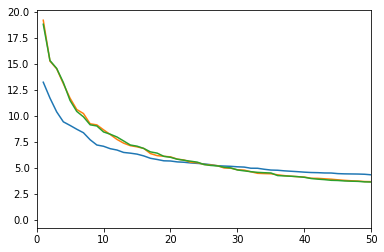

In [21]:
import matplotlib.pyplot as plt
plt.xlim([0,50])
plt.plot(range(1,len(s10)+1),s10)
plt.plot(range(1,len(s100)+1),s100)
plt.plot(range(1,len(s1000)+1),s1000)
plt.show()

In [22]:
'''As seen from the plot, all 3 lines have their turning points when x axis is 15, 
therefore 15 seems a good number of components.'''

'As seen from the plot, all 3 lines have their turning points when x axis is 15, \ntherefore 15 seems a good number of components.'

In [23]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer 

lsa = TruncatedSVD(15, algorithm = 'randomized')
dtm10_lsa = lsa.fit_transform(centered_dtm10) 
dtm10_lsa = Normalizer(copy=False).fit_transform(dtm10_lsa)
vt10 = lsa.components_
i = list(range(15))
df10 = pd.DataFrame.from_records(dtm10_lsa,columns = i)
df10

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.127040,0.387808,0.194983,-0.048425,0.113153,-0.283633,0.716706,-0.116939,-0.331328,0.025602,-0.108051,0.092658,0.132035,0.136901,-0.075102
1,0.695635,-0.059949,-0.007055,-0.508728,0.297913,0.153197,0.040969,0.237404,0.000737,0.183708,0.162461,-0.002887,-0.096484,0.067536,0.096758
2,0.423181,0.620619,-0.469629,-0.166854,0.220195,0.076511,-0.077923,0.230627,0.003484,-0.090678,0.009705,-0.203644,-0.140482,-0.056429,-0.032214
3,-0.132357,0.644986,-0.032655,-0.103450,0.028734,0.367418,-0.250435,-0.149594,0.037832,0.046625,-0.259030,0.055122,0.443467,-0.147952,-0.203705
4,0.687845,-0.235860,-0.351489,-0.105212,0.131321,-0.123889,0.052960,-0.130045,0.032924,0.408379,-0.066214,-0.213474,0.166801,-0.146633,-0.131065
5,-0.230070,-0.085439,0.140131,0.442844,0.015386,0.149839,0.028379,-0.407812,-0.095249,-0.175685,-0.154366,-0.512142,0.205593,-0.169349,0.370422
6,0.546316,-0.272614,0.628438,-0.171543,0.157353,0.092351,-0.244461,-0.066656,0.104950,-0.022038,-0.155595,0.112161,0.212847,-0.108139,-0.008876
7,0.218222,0.630429,0.246022,0.133307,0.076689,-0.129662,0.549103,0.179427,-0.014594,-0.283812,0.064070,-0.002552,0.170007,0.070597,0.038460
8,-0.303497,0.025157,0.239511,-0.041375,0.087161,-0.308316,-0.189484,-0.508429,-0.022762,0.126100,0.457621,-0.083028,0.464139,0.016839,-0.051766
9,-0.432814,-0.194468,0.060263,-0.045279,0.276711,-0.276167,-0.007619,0.062375,0.312251,0.376665,0.192425,0.377270,-0.199676,-0.343849,0.188538


In [24]:
df10.insert(15,'latitude',latitude)
df10.insert(16,'longitude',longitude)
df10

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,latitude,longitude
0,0.127040,0.387808,0.194983,-0.048425,0.113153,-0.283633,0.716706,-0.116939,-0.331328,0.025602,-0.108051,0.092658,0.132035,0.136901,-0.075102,36.066914,-115.170848
1,0.695635,-0.059949,-0.007055,-0.508728,0.297913,0.153197,0.040969,0.237404,0.000737,0.183708,0.162461,-0.002887,-0.096484,0.067536,0.096758,36.064652,-115.118954
2,0.423181,0.620619,-0.469629,-0.166854,0.220195,0.076511,-0.077923,0.230627,0.003484,-0.090678,0.009705,-0.203644,-0.140482,-0.056429,-0.032214,36.068259,-115.178877
3,-0.132357,0.644986,-0.032655,-0.103450,0.028734,0.367418,-0.250435,-0.149594,0.037832,0.046625,-0.259030,0.055122,0.443467,-0.147952,-0.203705,36.111057,-115.241688
4,0.687845,-0.235860,-0.351489,-0.105212,0.131321,-0.123889,0.052960,-0.130045,0.032924,0.408379,-0.066214,-0.213474,0.166801,-0.146633,-0.131065,36.130013,-115.109310
5,-0.230070,-0.085439,0.140131,0.442844,0.015386,0.149839,0.028379,-0.407812,-0.095249,-0.175685,-0.154366,-0.512142,0.205593,-0.169349,0.370422,36.170706,-115.190288
6,0.546316,-0.272614,0.628438,-0.171543,0.157353,0.092351,-0.244461,-0.066656,0.104950,-0.022038,-0.155595,0.112161,0.212847,-0.108139,-0.008876,36.112895,-115.062353
7,0.218222,0.630429,0.246022,0.133307,0.076689,-0.129662,0.549103,0.179427,-0.014594,-0.283812,0.064070,-0.002552,0.170007,0.070597,0.038460,36.034244,-115.171409
8,-0.303497,0.025157,0.239511,-0.041375,0.087161,-0.308316,-0.189484,-0.508429,-0.022762,0.126100,0.457621,-0.083028,0.464139,0.016839,-0.051766,36.010086,-115.118656
9,-0.432814,-0.194468,0.060263,-0.045279,0.276711,-0.276167,-0.007619,0.062375,0.312251,0.376665,0.192425,0.377270,-0.199676,-0.343849,0.188538,36.098632,-115.136079


In [ ]:
df10list = []
for row in df10.itertuples():
    df10list.append(list(row)[1:])
df10list

In [26]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer 

lsa = TruncatedSVD(15, algorithm = 'randomized')
dtm100_lsa = lsa.fit_transform(centered_dtm100) 
dtm100_lsa = Normalizer(copy=False).fit_transform(dtm100_lsa)
vt100 = lsa.components_
i = list(range(15))
df100 = pd.DataFrame.from_records(dtm100_lsa,columns = i)
df100

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.107872,-0.347308,-0.480319,0.239878,0.152305,-0.000253,0.346645,-0.227196,-0.511304,0.107836,-0.257283,0.166368,0.009284,0.113630,-0.067706
1,0.074281,-0.481809,-0.054968,-0.510543,-0.370272,0.468664,0.098661,0.038711,0.260512,-0.146793,0.049623,-0.136039,0.112900,-0.008112,-0.086553
2,0.138733,-0.075951,-0.284615,0.534784,-0.040872,0.689617,0.230479,-0.113423,0.039613,-0.234499,0.013728,-0.065488,0.047898,-0.022928,0.030024
3,-0.119043,0.133884,-0.287136,0.503960,-0.304898,0.195723,-0.045148,0.471268,0.076000,-0.147026,-0.337357,-0.222927,-0.125864,-0.067856,-0.254428
4,-0.009668,-0.495832,-0.187865,-0.318593,0.182680,0.111221,0.364422,-0.156835,0.548508,-0.259642,0.083569,-0.084846,0.013007,-0.177441,0.002793
5,0.121046,-0.221098,-0.471400,0.161798,0.187782,-0.520891,-0.186280,-0.058874,-0.089043,0.222715,-0.013167,-0.109815,0.158031,-0.213270,0.450654
6,0.109184,-0.391400,-0.183652,-0.394723,-0.535379,0.192978,-0.441337,0.270320,-0.060623,0.053131,0.030519,-0.139741,-0.014626,-0.005305,-0.162570
7,-0.129705,-0.309876,-0.556507,0.443084,0.255127,0.113830,0.060137,-0.224948,-0.454977,0.081555,0.062555,0.133735,-0.095928,0.026487,0.059234
8,0.306185,0.341273,-0.127834,0.112210,-0.320758,-0.175617,-0.322618,0.398373,0.153636,-0.094463,-0.345512,-0.389449,-0.116836,-0.188579,-0.107479
9,-0.108740,0.042108,0.517260,-0.184537,0.076621,0.166636,0.106843,0.289984,-0.293457,0.074881,-0.278839,-0.116399,0.374250,0.230265,-0.423718


In [27]:
df100.insert(15,'latitude',latitude)
df100.insert(16,'longitude',longitude)
df100

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,latitude,longitude
0,-0.107872,-0.347308,-0.480319,0.239878,0.152305,-0.000253,0.346645,-0.227196,-0.511304,0.107836,-0.257283,0.166368,0.009284,0.113630,-0.067706,36.066914,-115.170848
1,0.074281,-0.481809,-0.054968,-0.510543,-0.370272,0.468664,0.098661,0.038711,0.260512,-0.146793,0.049623,-0.136039,0.112900,-0.008112,-0.086553,36.064652,-115.118954
2,0.138733,-0.075951,-0.284615,0.534784,-0.040872,0.689617,0.230479,-0.113423,0.039613,-0.234499,0.013728,-0.065488,0.047898,-0.022928,0.030024,36.068259,-115.178877
3,-0.119043,0.133884,-0.287136,0.503960,-0.304898,0.195723,-0.045148,0.471268,0.076000,-0.147026,-0.337357,-0.222927,-0.125864,-0.067856,-0.254428,36.111057,-115.241688
4,-0.009668,-0.495832,-0.187865,-0.318593,0.182680,0.111221,0.364422,-0.156835,0.548508,-0.259642,0.083569,-0.084846,0.013007,-0.177441,0.002793,36.130013,-115.109310
5,0.121046,-0.221098,-0.471400,0.161798,0.187782,-0.520891,-0.186280,-0.058874,-0.089043,0.222715,-0.013167,-0.109815,0.158031,-0.213270,0.450654,36.170706,-115.190288
6,0.109184,-0.391400,-0.183652,-0.394723,-0.535379,0.192978,-0.441337,0.270320,-0.060623,0.053131,0.030519,-0.139741,-0.014626,-0.005305,-0.162570,36.112895,-115.062353
7,-0.129705,-0.309876,-0.556507,0.443084,0.255127,0.113830,0.060137,-0.224948,-0.454977,0.081555,0.062555,0.133735,-0.095928,0.026487,0.059234,36.034244,-115.171409
8,0.306185,0.341273,-0.127834,0.112210,-0.320758,-0.175617,-0.322618,0.398373,0.153636,-0.094463,-0.345512,-0.389449,-0.116836,-0.188579,-0.107479,36.010086,-115.118656
9,-0.108740,0.042108,0.517260,-0.184537,0.076621,0.166636,0.106843,0.289984,-0.293457,0.074881,-0.278839,-0.116399,0.374250,0.230265,-0.423718,36.098632,-115.136079


In [ ]:
df100list = []
for row in df100.itertuples():
    df100list.append(list(row)[1:])
df100list

In [29]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer 

lsa = TruncatedSVD(15, algorithm = 'randomized')
dtm1000_lsa = lsa.fit_transform(centered_dtm1000) 
dtm1000_lsa = Normalizer(copy=False).fit_transform(dtm1000_lsa)
vt1000 = lsa.components_
i = list(range(15))
df1000 = pd.DataFrame.from_records(dtm1000_lsa,columns = i)
df1000

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.088266,0.132085,0.590565,0.138291,0.240335,0.077657,0.437896,-0.191101,-0.221970,-0.285655,-0.420710,-0.064049,0.033625,0.036563,-0.019273
1,0.088058,0.422307,0.240323,-0.518116,-0.327173,0.464206,0.094878,0.170142,0.160891,0.207241,0.084625,-0.089357,-0.076927,-0.005904,0.193104
2,0.070653,-0.085534,0.329801,0.476770,0.101068,0.669671,0.253590,-0.117157,0.090949,0.287060,0.087336,0.016663,-0.105112,-0.072379,0.006190
3,-0.053895,-0.198007,0.210696,0.409892,-0.221188,0.226326,-0.011214,0.510346,-0.325378,0.140971,-0.022958,-0.493541,-0.036477,-0.017968,0.115115
4,0.015928,0.369584,0.366081,-0.353917,0.159291,0.017616,0.248566,0.117298,0.443946,0.495504,0.146346,-0.014348,-0.044184,-0.184387,0.049664
5,0.059310,-0.065827,0.565711,0.222182,0.100398,-0.503589,-0.248978,-0.061033,0.011520,-0.274440,-0.083312,-0.079145,-0.215448,-0.357907,-0.173746
6,0.110270,0.275153,0.318985,-0.400816,-0.538289,0.291465,-0.344673,0.139488,-0.241511,-0.096115,0.165639,-0.151347,-0.028697,0.042836,0.127269
7,-0.136604,0.052007,0.619278,0.369750,0.359041,0.139523,0.138418,-0.391339,-0.210662,-0.192059,-0.092015,0.165333,0.078477,0.022879,-0.118245
8,0.173032,-0.370317,0.011015,0.187833,-0.345473,-0.149262,-0.327525,0.393085,-0.186053,0.131975,-0.015579,-0.462530,-0.212823,-0.272970,-0.089926
9,-0.106520,0.272533,-0.476081,-0.111681,0.054071,0.133736,0.079316,0.149778,-0.233041,-0.192391,-0.156792,-0.066619,-0.295184,0.256068,0.593862


In [30]:
df1000.insert(15,'latitude',latitude)
df1000.insert(16,'longitude',longitude)
df1000

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,latitude,longitude
0,-0.088266,0.132085,0.590565,0.138291,0.240335,0.077657,0.437896,-0.191101,-0.221970,-0.285655,-0.420710,-0.064049,0.033625,0.036563,-0.019273,36.066914,-115.170848
1,0.088058,0.422307,0.240323,-0.518116,-0.327173,0.464206,0.094878,0.170142,0.160891,0.207241,0.084625,-0.089357,-0.076927,-0.005904,0.193104,36.064652,-115.118954
2,0.070653,-0.085534,0.329801,0.476770,0.101068,0.669671,0.253590,-0.117157,0.090949,0.287060,0.087336,0.016663,-0.105112,-0.072379,0.006190,36.068259,-115.178877
3,-0.053895,-0.198007,0.210696,0.409892,-0.221188,0.226326,-0.011214,0.510346,-0.325378,0.140971,-0.022958,-0.493541,-0.036477,-0.017968,0.115115,36.111057,-115.241688
4,0.015928,0.369584,0.366081,-0.353917,0.159291,0.017616,0.248566,0.117298,0.443946,0.495504,0.146346,-0.014348,-0.044184,-0.184387,0.049664,36.130013,-115.109310
5,0.059310,-0.065827,0.565711,0.222182,0.100398,-0.503589,-0.248978,-0.061033,0.011520,-0.274440,-0.083312,-0.079145,-0.215448,-0.357907,-0.173746,36.170706,-115.190288
6,0.110270,0.275153,0.318985,-0.400816,-0.538289,0.291465,-0.344673,0.139488,-0.241511,-0.096115,0.165639,-0.151347,-0.028697,0.042836,0.127269,36.112895,-115.062353
7,-0.136604,0.052007,0.619278,0.369750,0.359041,0.139523,0.138418,-0.391339,-0.210662,-0.192059,-0.092015,0.165333,0.078477,0.022879,-0.118245,36.034244,-115.171409
8,0.173032,-0.370317,0.011015,0.187833,-0.345473,-0.149262,-0.327525,0.393085,-0.186053,0.131975,-0.015579,-0.462530,-0.212823,-0.272970,-0.089926,36.010086,-115.118656
9,-0.106520,0.272533,-0.476081,-0.111681,0.054071,0.133736,0.079316,0.149778,-0.233041,-0.192391,-0.156792,-0.066619,-0.295184,0.256068,0.593862,36.098632,-115.136079


In [ ]:
df1000list = []
for row in df1000.itertuples():
    df1000list.append(list(row)[1:])
df1000list

Find clusters using the 3 different techniques we discussed in class: k-means++, hierarchical, and GMM for **each** of the 3 feature vectors per business (remember you created feature vectors based on $k = \{10,100,1000\}$). Visualize the clusters by plotting the longitude/latitude of the restaurants in a scatter plot and label each cluster. 

Note that to label each cluster, you will need to think about how to extract labels from the LSA results.
**(4 pts)**

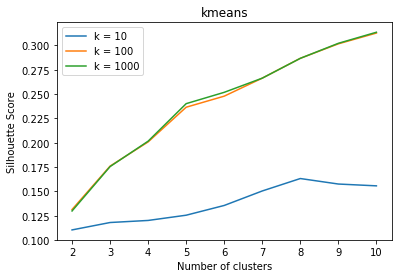

In [163]:
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
def sc_evaluate_clusters(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X,kmeans.labels_,metric='euclidean')
    plt.plot(range(2,len(s)),s[2:])
    plt.title('kmeans')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    
sc_evaluate_clusters(df10,10)
sc_evaluate_clusters(df100,10)
sc_evaluate_clusters(df1000,10)
plt.legend(('k = 10','k = 100', 'k = 1000'),loc = 'best')
plt.show()

In [ ]:
'''As seen from the plot above, for k-means, we could see that when we have 8 clusters, silhouette scores get their
local maximum points,so the number of clusters could be 8.'''

In [98]:
# When k=10, n_clusters=8
kmeans10 = KMeans(init='k-means++', n_clusters=8, n_init=100)
predict10 = kmeans10.fit_predict(df10)
centroids10 = kmeans10.cluster_centers_
labels10 = kmeans10.labels_
# When k=100, n_clusters=5
kmeans100 = KMeans(init='k-means++', n_clusters=5, n_init=100)
predict100 = kmeans100.fit_predict(df100)
centroids100 = kmeans100.cluster_centers_
labels100 = kmeans100.labels_
# When k=1000, n_clusters=5
kmeans1000 = KMeans(init='k-means++', n_clusters=5, n_init=100)
predict1000 = kmeans1000.fit_predict(df1000)
centroids1000 = kmeans1000.cluster_centers_
labels1000 = kmeans1000.labels_

In [126]:
def find_labels(centroids,terms):
    centroids10_new = centroids10[:,:15].argsort()[:,::-1]
    labels_new = []
    for i in range(8):
        temp = []
        for ind in centroids10_new[i,:5]:
            temp.append(terms10[ind])
        labels_new.append(temp)
    return labels_new

#find_labels(centroids10,terms10)
#find_labels(centroids100,terms100)
#find_labels(centroids1000,terms1000)

In [127]:
A = find_labels(centroids10,terms10)
B = find_labels(centroids100,terms100)
C = find_labels(centroids1000,terms1000)

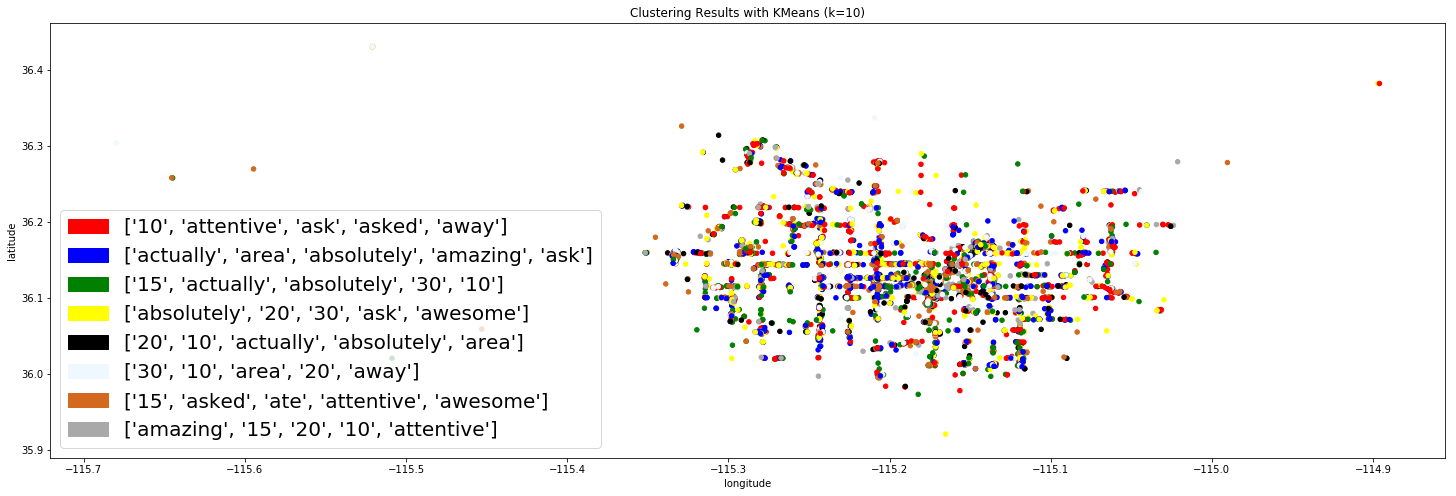

In [147]:
import matplotlib.patches as mpatches
array10 = np.asarray(df10list)
colors = [['red','blue','green','yellow','black','aliceblue','chocolate','darkgray'][p] for p in labels10]
plt.figure(figsize=(25,8))
red_patch = mpatches.Patch(color='red', label=A[0])
blue_patch = mpatches.Patch(color='blue', label=A[1])
green_patch = mpatches.Patch(color='green', label=A[2])
yellow_patch = mpatches.Patch(color='yellow', label=A[3])
black_patch = mpatches.Patch(color='black', label=A[4])
aliceblue_patch = mpatches.Patch(color='aliceblue', label=A[5])
chocolate_patch = mpatches.Patch(color='chocolate', label=A[6])
darkgray_patch = mpatches.Patch(color='darkgray', label=A[7])
plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch, black_patch,aliceblue_patch,chocolate_patch,darkgray_patch],loc='best', prop={'size': 20})
plt.title('Clustering Results with KMeans (k=10)')
plt.xlabel('longitude')
plt.ylabel('latitude')
_ = plt.scatter(array10[:, -1], array10[:, -2], color=colors, s=20)
plt.show()

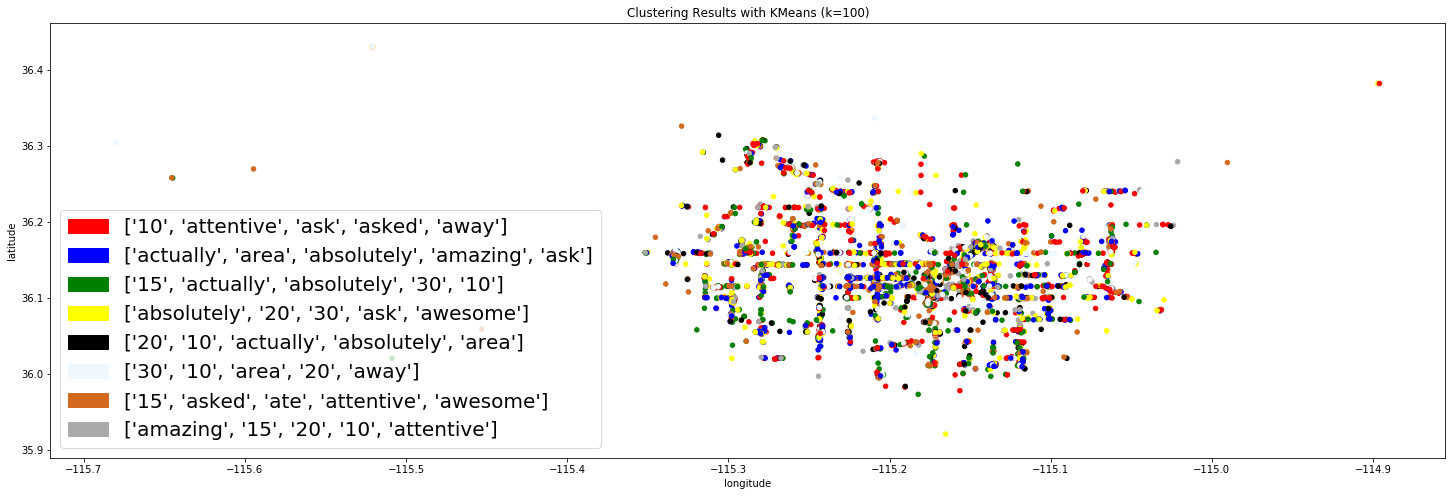

In [146]:
import matplotlib.patches as mpatches
array100 = np.asarray(df100list)
colors = [['red','blue','green','yellow','black','aliceblue','chocolate','darkgray'][p] for p in labels10]
plt.figure(figsize=(25,8))
red_patch = mpatches.Patch(color='red', label=B[0])
blue_patch = mpatches.Patch(color='blue', label=B[1])
green_patch = mpatches.Patch(color='green', label=B[2])
yellow_patch = mpatches.Patch(color='yellow', label=B[3])
black_patch = mpatches.Patch(color='black', label=B[4])
aliceblue_patch = mpatches.Patch(color='aliceblue', label=B[5])
chocolate_patch = mpatches.Patch(color='chocolate', label=B[6])
darkgray_patch = mpatches.Patch(color='darkgray', label=B[7])
plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch, black_patch,aliceblue_patch,chocolate_patch,darkgray_patch], loc = 'best', prop={'size': 20})
plt.title('Clustering Results with KMeans (k=100)')
plt.xlabel('longitude')
plt.ylabel('latitude')
_ = plt.scatter(array100[:, -1], array100[:, -2], color=colors, s=20)
plt.show()

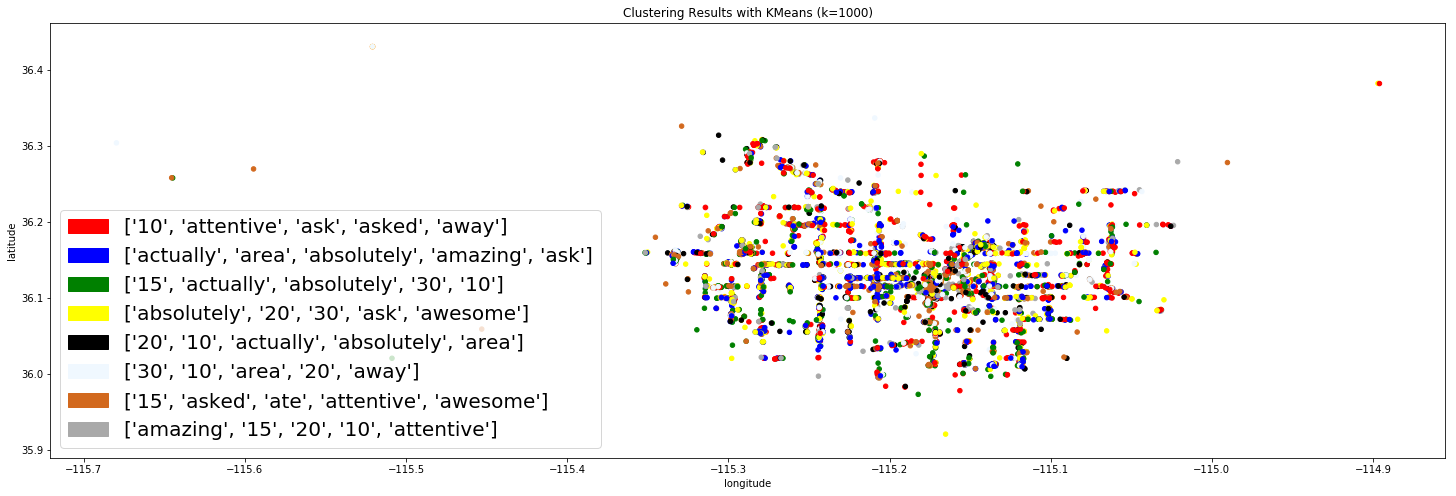

In [145]:
import matplotlib.patches as mpatches
array1000 = np.asarray(df1000list)
colors = [['red','blue','green','yellow','black','aliceblue','chocolate','darkgray'][p] for p in labels10]
plt.figure(figsize=(25,8))
red_patch = mpatches.Patch(color='red', label=C[0])
blue_patch = mpatches.Patch(color='blue', label=C[1])
green_patch = mpatches.Patch(color='green', label=C[2])
yellow_patch = mpatches.Patch(color='yellow', label=C[3])
black_patch = mpatches.Patch(color='black', label=C[4])
aliceblue_patch = mpatches.Patch(color='aliceblue', label=C[5])
chocolate_patch = mpatches.Patch(color='chocolate', label=C[6])
darkgray_patch = mpatches.Patch(color='darkgray', label=C[7])
plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch, black_patch,aliceblue_patch,chocolate_patch,darkgray_patch], loc = 'best', prop={'size': 20})
plt.title('Clustering Results with KMeans (k=1000)')
plt.xlabel('longitude')
plt.ylabel('latitude')
_ = plt.scatter(array1000[:, -1], array1000[:, -2], color=colors, s=20)
plt.show()

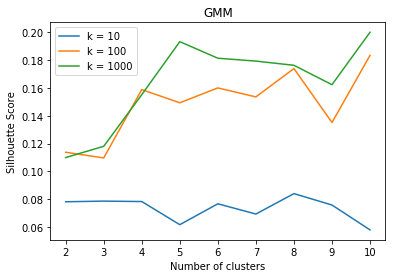

In [192]:
#from sklearn.cluster import AgglomerativeClustering
#import scipy.cluster.hierarchy as hierarchy
from sklearn import mixture
import sklearn.metrics as metrics
def gmm_evaluate_clusters(X,max_clusters):
    g = np.zeros(max_clusters+1)
    g[0] = 0;
    g[1] = 0;
    for k in range(2,max_clusters+1):
        gmm = mixture.GaussianMixture(n_components=k, covariance_type='full').fit(X)
        gmm_labels = gmm.predict(X)
        g[k] = metrics.silhouette_score(X,gmm_labels,metric='euclidean')
    plt.plot(range(2,len(g)),g[2:])
    plt.title('GMM')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    
gmm_evaluate_clusters(df10,10)
gmm_evaluate_clusters(df100,10)
gmm_evaluate_clusters(df1000,10)
plt.legend(('k = 10','k = 100', 'k = 1000'),loc = 'best')
plt.show()

In [ ]:
'''As seen from the plot above, for GMM, we could see that when we have 8 clusters, silhouette scores get their
local maximum points,so the number of clusters could be 8.'''

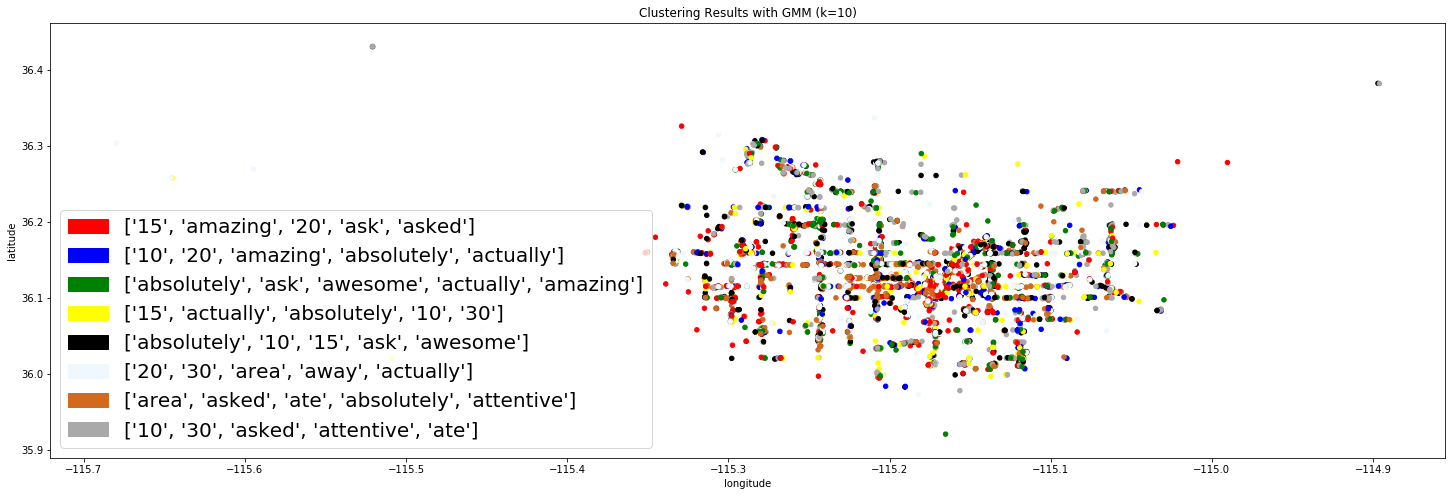

In [217]:
from sklearn import mixture
gmm10 = mixture.GaussianMixture(n_components=8, covariance_type='full')
gmm10.fit(df10)
y_pred10 = gmm10.predict(df10)
colors = [['red','blue','green','yellow','black','aliceblue','chocolate','darkgray'][p] for p in y_pred10]
gcenter10 = gmm10.means_
gorder10 = gcenter10[:,:15].argsort()[:, ::-1]
#gcenter10
labels = []
for i in range(8):
    temp = []
    for ind in gorder10[i,:5]:
        temp.append(terms10[ind])
    labels.append(temp)
plt.figure(figsize=(25,8))
red_patch = mpatches.Patch(color='red', label=labels[0])
blue_patch = mpatches.Patch(color='blue', label=labels[1])
green_patch = mpatches.Patch(color='green', label=labels[2])
yellow_patch = mpatches.Patch(color='yellow', label=labels[3])
black_patch = mpatches.Patch(color='black', label=labels[4])
aliceblue_patch = mpatches.Patch(color='aliceblue', label=labels[5])
chocolate_patch = mpatches.Patch(color='chocolate', label=labels[6])
darkgray_patch = mpatches.Patch(color='darkgray', label=labels[7])
plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch, black_patch,aliceblue_patch,chocolate_patch,darkgray_patch],loc='best', prop={'size': 20})
plt.title('Clustering Results with GMM (k=10)')
plt.xlabel('longitude')
plt.ylabel('latitude')
_ = plt.scatter(array10[:, -1], array10[:, -2], color=colors, s=20)
plt.show()

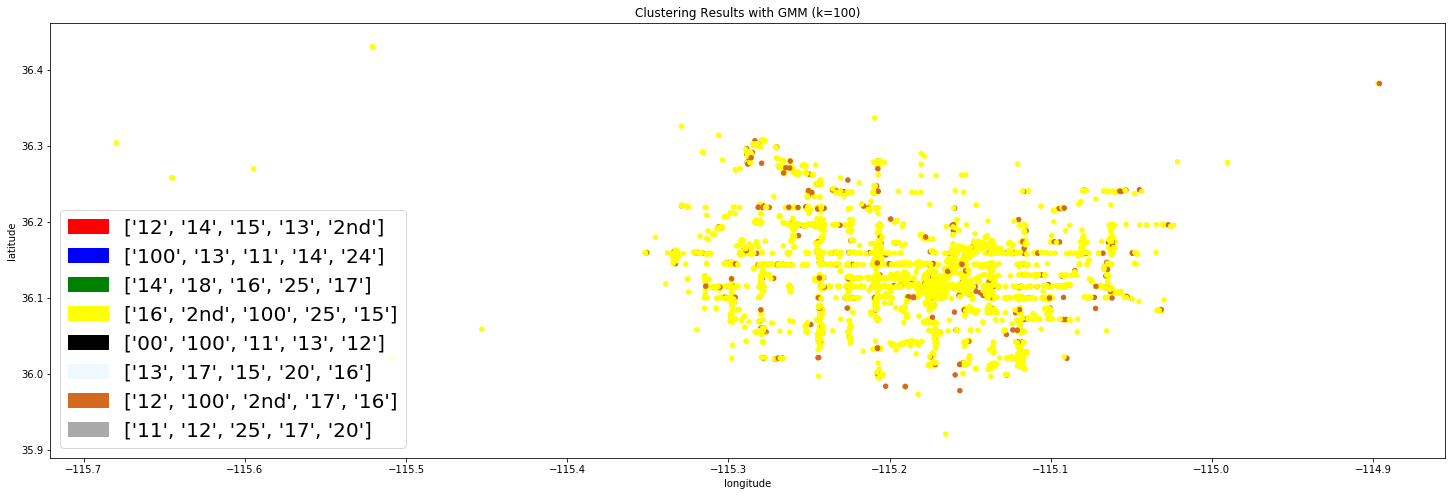

In [216]:
from sklearn import mixture
gmm100 = mixture.GaussianMixture(n_components=8, covariance_type='full')
gmm100.fit(df100)
y_pred100 = gmm100.predict(df10)
colors = [['red','blue','green','yellow','black','aliceblue','chocolate','darkgray'][p] for p in y_pred100]
gcenter100 = gmm100.means_
gorder100 = gcenter100[:,:15].argsort()[:, ::-1]
#gcenter10
labels = []
for i in range(8):
    temp = []
    for ind in gorder100[i,:5]:
        temp.append(terms100[ind])
    labels.append(temp)
plt.figure(figsize=(25,8))
red_patch = mpatches.Patch(color='red', label=labels[0])
blue_patch = mpatches.Patch(color='blue', label=labels[1])
green_patch = mpatches.Patch(color='green', label=labels[2])
yellow_patch = mpatches.Patch(color='yellow', label=labels[3])
black_patch = mpatches.Patch(color='black', label=labels[4])
aliceblue_patch = mpatches.Patch(color='aliceblue', label=labels[5])
chocolate_patch = mpatches.Patch(color='chocolate', label=labels[6])
darkgray_patch = mpatches.Patch(color='darkgray', label=labels[7])
plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch, black_patch,aliceblue_patch,chocolate_patch,darkgray_patch],loc='best', prop={'size': 20})
plt.title('Clustering Results with GMM (k=100)')
plt.xlabel('longitude')
plt.ylabel('latitude')
_ = plt.scatter(array100[:, -1], array100[:, -2], color=colors, s=20)
plt.show()

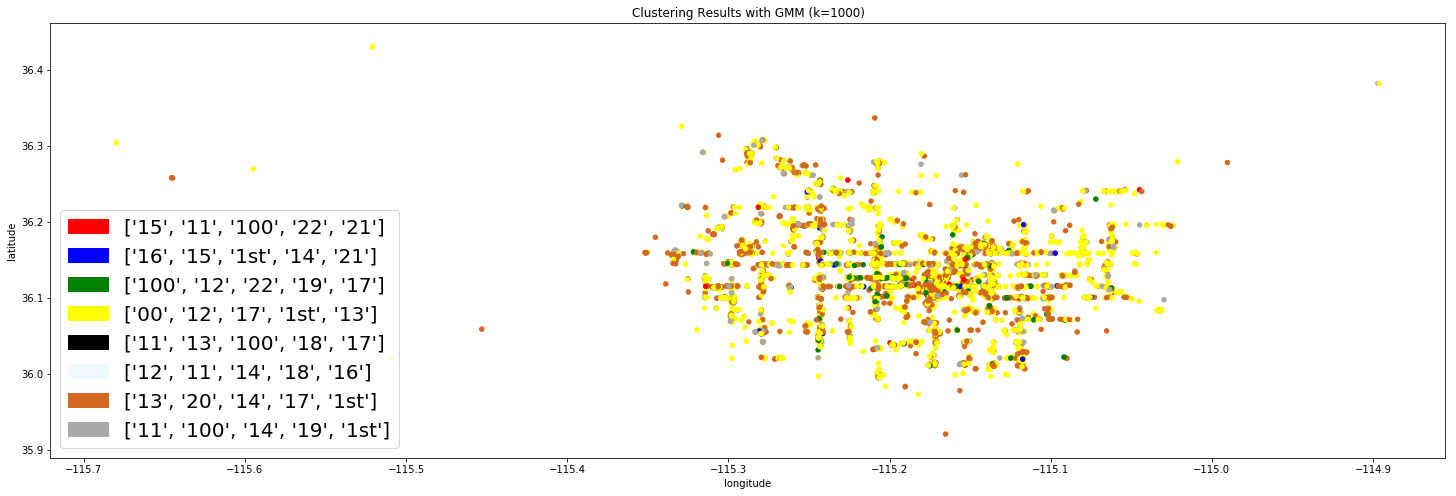

In [209]:
from sklearn import mixture
gmm1000 = mixture.GaussianMixture(n_components=8, covariance_type='full')
gmm1000.fit(df1000)
y_pred1000 = gmm10.predict(df1000)
colors = [['red','blue','green','yellow','black','aliceblue','chocolate','darkgray'][p] for p in y_pred1000]
gcenter1000 = gmm1000.means_
gorder1000 = gcenter1000[:,:15].argsort()[:, ::-1]
#gcenter10
labels = []
for i in range(8):
    temp = []
    for ind in gorder1000[i,:5]:
        temp.append(terms1000[ind])
    labels.append(temp)
plt.figure(figsize=(25,8))
red_patch = mpatches.Patch(color='red', label=labels[0])
blue_patch = mpatches.Patch(color='blue', label=labels[1])
green_patch = mpatches.Patch(color='green', label=labels[2])
yellow_patch = mpatches.Patch(color='yellow', label=labels[3])
black_patch = mpatches.Patch(color='black', label=labels[4])
aliceblue_patch = mpatches.Patch(color='aliceblue', label=labels[5])
chocolate_patch = mpatches.Patch(color='chocolate', label=labels[6])
darkgray_patch = mpatches.Patch(color='darkgray', label=labels[7])
plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch, black_patch,aliceblue_patch,chocolate_patch,darkgray_patch],loc='best', prop={'size': 20})
plt.title('Clustering Results with GMM (k=1000)')
plt.xlabel('longitude')
plt.ylabel('latitude')
_ = plt.scatter(array1000[:, -1], array1000[:, -2], color=colors, s=20)
plt.show()

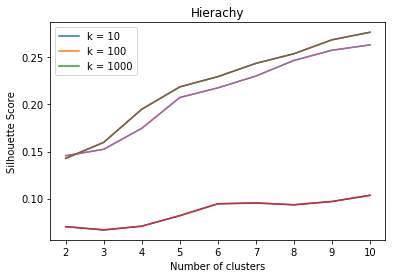

In [219]:
def evaluate_h(X):
    Z = hierarchy.linkage(X, method='ward', metric='euclidean')
    max_clusters = 10
    s = np.zeros(max_clusters+1)
    for k in range(2,max_clusters+1):
        clusters = hierarchy.fcluster(Z, k, criterion='maxclust')
        s[k] = metrics.silhouette_score(X,clusters,metric='euclidean')
    plt.plot(range(2,len(s)),s[2:])
    plt.title('Hierachy')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
evaluate_h(df10)
evaluate_h(df100) 
evaluate_h(df1000) 
plt.legend(('k = 10','k = 100', 'k = 1000'),loc = 'best')
plt.show()

In [ ]:
'''As seen from the plot above, for Hierachy, we could see that when we have 5 clusters, silhouette scores get their
local maximum points,so the number of clusters could be 5.'''

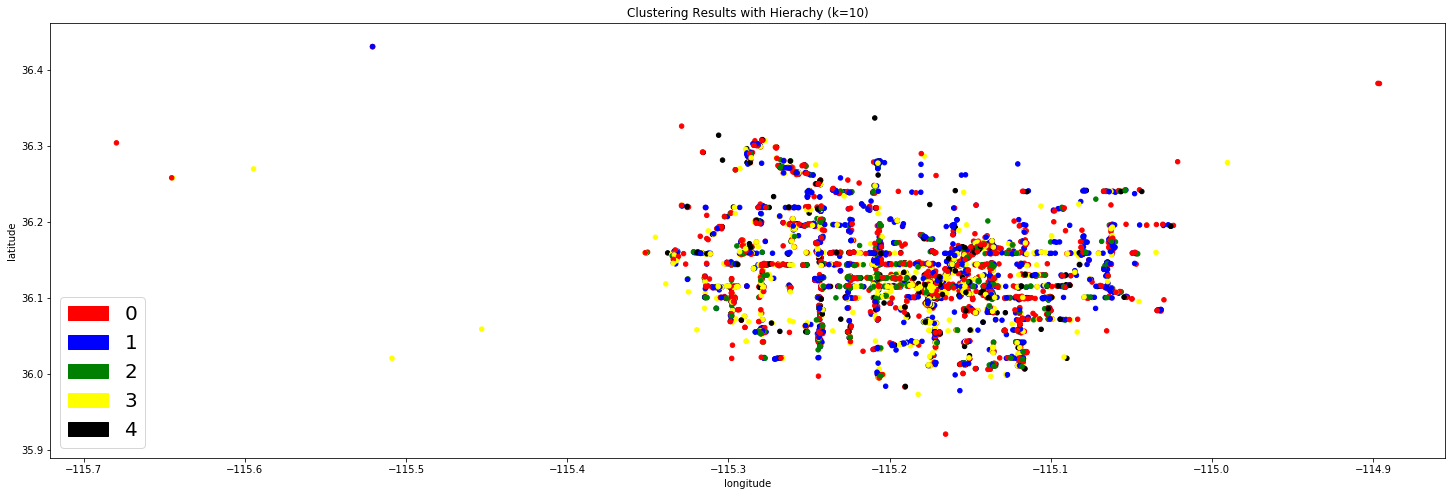

In [231]:
hierachy = AgglomerativeClustering(n_clusters=5)
hierachy.fit(array10)
h_pred10 = hierachy.labels_
colors = [['red','blue','green','yellow','black'][p] for p in h_pred10]
plt.figure(figsize=(25,8))
red_patch = mpatches.Patch(color='red', label='0')
blue_patch = mpatches.Patch(color='blue', label='1')
green_patch = mpatches.Patch(color='green', label='2')
yellow_patch = mpatches.Patch(color='yellow', label='3')
black_patch = mpatches.Patch(color='black', label='4')
plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch, black_patch], loc = 'best', prop={'size': 20})
plt.title('Clustering Results with Hierachy (k=10)')
plt.xlabel('longitude')
plt.ylabel('latitude')
_ = plt.scatter(array10[:, -1], array10[:, -2], color=colors, s=20)
plt.show()

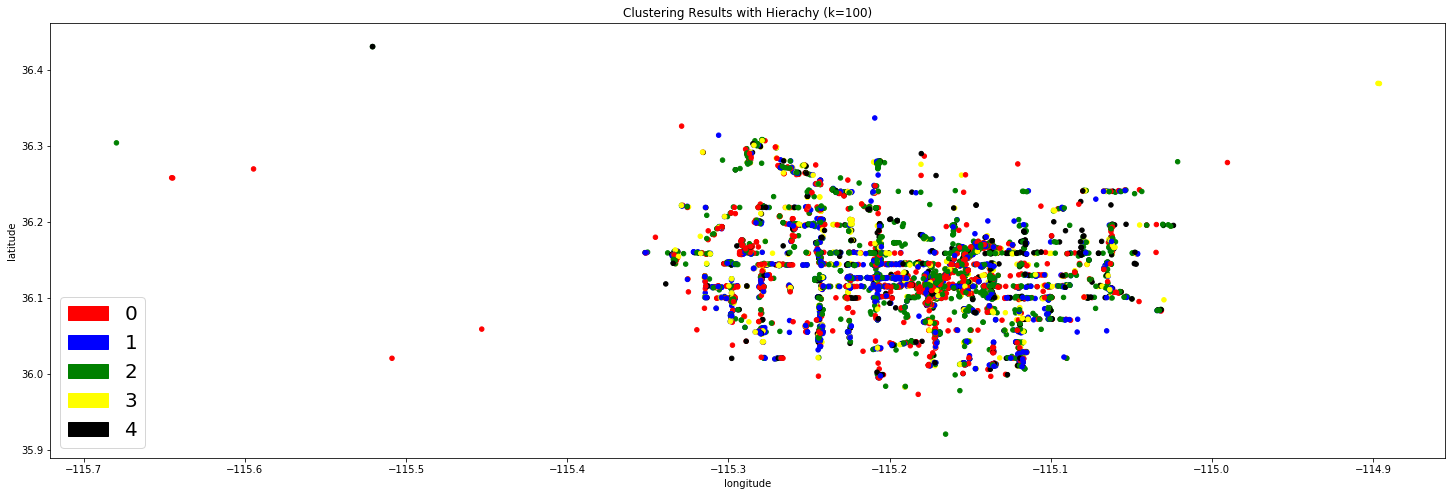

In [232]:
hierachy = AgglomerativeClustering(n_clusters=5)
hierachy.fit(array100)
h_pred100 = hierachy.labels_
colors = [['red','blue','green','yellow','black'][p] for p in h_pred100]
plt.figure(figsize=(25,8))
red_patch = mpatches.Patch(color='red', label='0')
blue_patch = mpatches.Patch(color='blue', label='1')
green_patch = mpatches.Patch(color='green', label='2')
yellow_patch = mpatches.Patch(color='yellow', label='3')
black_patch = mpatches.Patch(color='black', label='4')
plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch, black_patch], loc = 'best', prop={'size': 20})
plt.title('Clustering Results with Hierachy (k=100)')
plt.xlabel('longitude')
plt.ylabel('latitude')
_ = plt.scatter(array100[:, -1], array100[:, -2], color=colors, s=20)
plt.show()

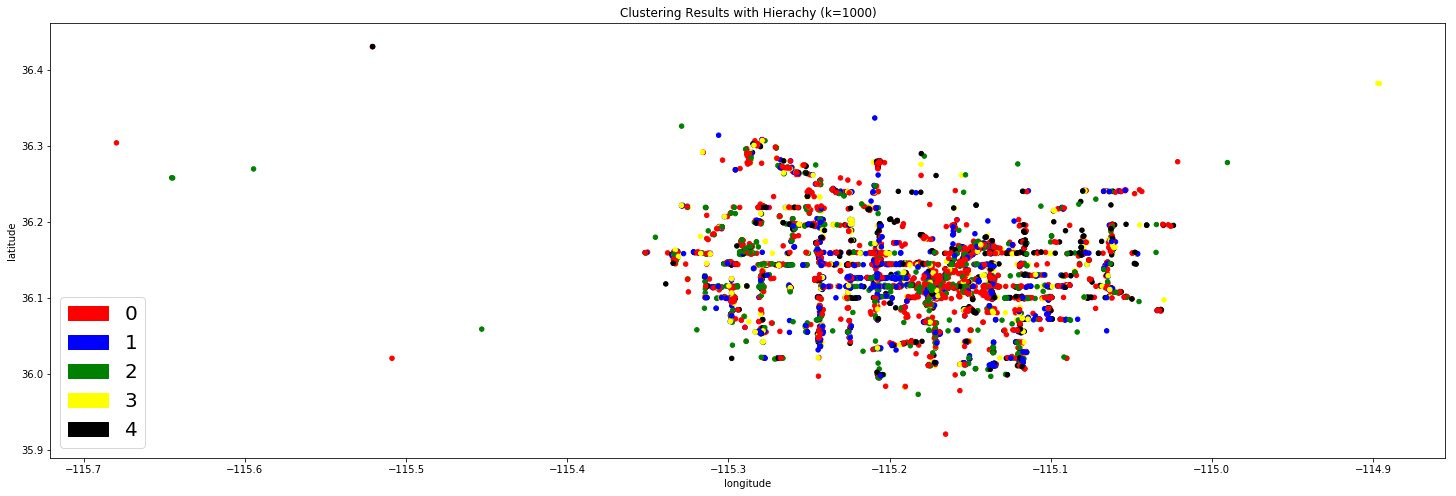

In [233]:
hierachy = AgglomerativeClustering(n_clusters=5)
hierachy.fit(array1000)
h_pred1000 = hierachy.labels_
colors = [['red','blue','green','yellow','black'][p] for p in h_pred1000]
plt.figure(figsize=(25,8))
red_patch = mpatches.Patch(color='red', label='0')
blue_patch = mpatches.Patch(color='blue', label='1')
green_patch = mpatches.Patch(color='green', label='2')
yellow_patch = mpatches.Patch(color='yellow', label='3')
black_patch = mpatches.Patch(color='black', label='4')
plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch, black_patch], loc = 'best', prop={'size': 20})
plt.title('Clustering Results with Hierachy (k=1000)')
plt.xlabel('longitude')
plt.ylabel('latitude')
_ = plt.scatter(array1000[:, -1], array1000[:, -2], color=colors, s=20)
plt.show()

What observations can you make regarding the different $k$ values and clusterings? We are expecting comments on the labels of each cluster for the different $k$, on the districts created, on the results of each clustering e.t.c. In general, feel free to report any interesting findings you made. **(2 pts)**

In [ ]:
'''
  For different cluster methods, the numbers of clusters I chose based on Silhouette Score are different. The numbers of
clusters for kmeans and gmm are both 8 and the number of clusters for hierachy is 5.
  And differnt clusters methods showed different labels, among which the gmm labels showed a lot of numbers, which was 
unexpected since those numbers make no sense to customers' review. Therefore,it could be improved if we delete those numbers 
at the beginning after I got entire reviews.
  For different value of k {10,100,1000},the scatter distribution didn't show much difference.
'''

----------